# Model Fine Tuning: Bias-Variance Trade Off

Rafiq Islam  
2024-09-23

## Introduction

The bias-variance tradeoff is a fundamental concept in machine learning
that helps us understand the balance between underfitting and
overfitting. It describes how different sources of error contribute to a
model’s overall prediction error and how we can optimize model
complexity for better generalization. <br> <br> To understand the
bias-variance tradeoff, let’s first define **bias** and **variance** in
the context of machine learning models: <br> <br> **Bias** is the error
introduced by approximating a real-world problem (often complex) by a
simplified model. High bias occurs when a model is too simple and can’t
capture the underlying patterns, leading to underfitting. <br> <br>
**Variance** is the model’s sensitivity to small fluctuations in the
training data. High variance indicates that the model is too complex,
fitting the noise in the training data rather than the actual signal,
leading to overfitting. <br> <br> The goal is to strike a balance
between bias and variance to minimize the overall error, often called
the **expected prediction error**.

## Mathematical Derivation

The expected mean squared error (MSE) between the true function $f(x)$
and the model’s predictions $\hat{f}(x)$ is given by:

Where:

-   $f(x)$ is the true function.
-   $\hat{f}(x)$ is the estimated function (the model).

The third term,
$2\mathbb{E}[(f(x) - \mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)] - \hat{f}(x))]$,
**vanishes** because the errors $f(x) - \mathbb{E}[\hat{f}(x)]$ and
$\mathbb{E}[\hat{f}(x)] - \hat{f}(x)$ are independent. This is a key
step in the decomposition.

-   $f(x) - \mathbb{E}[\hat{f}(x)]$ is the bias-related error.
-   $\mathbb{E}[\hat{f}(x)] - \hat{f}(x)$ is the variance-related error.

Since these two terms are uncorrelated, their cross-product expectation
equals zero:

$$
2\mathbb{E}[(f(x) - \mathbb{E}[\hat{f}(x)])(\mathbb{E}[\hat{f}(x)] - \hat{f}(x))] = 0
$$

**What is $\sigma^2$?**

Now, $\sigma^2$, the irreducible error, is the variance of the noise in
the data:

$$
\sigma^2 = \mathbb{E}[(y - f(x))^2] = \mathbb{E}[\epsilon^2]
$$

where $y = f(x) + \epsilon$, and $\epsilon$ is the noise term with
variance $\sigma^2$. This noise is independent of both the bias and
variance components and does not interact with them in the
decomposition. It is the part of the error that remains no matter how
good the model is.

$$
\text{MSE}(x) = (\text{Bias}[\hat{f}(x)])^2 + \text{Variance}[\hat{f}(x)] + \sigma^2
$$

## Bias-Variance Tradeoff Intuition

-   A **high bias** model makes strong assumptions about the data and
    fails to capture the underlying patterns, resulting in underfitting.

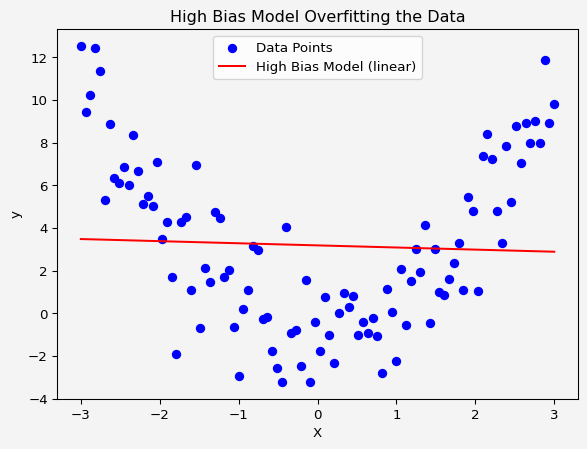

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.linspace(-3,3,100)
y = X**2 + np.random.randn(100)*2
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1,1),y)
y_pred = model.predict(X.reshape(-1,1))

plt.scatter(X,y, color='blue', label = 'Data Points')
plt.plot(X,y_pred, color='red', label='High Bias Model (linear)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('High Bias Model Overfitting the Data')
plt.legend()
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

-   A **high variance** model is highly flexible, capturing not only the
    signal but also the noise in the data, leading to overfitting.

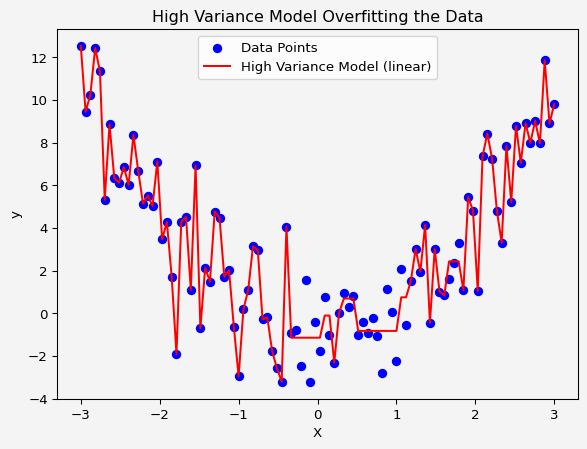

In [2]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=10)
model2.fit(X.reshape(-1,1),y)
y_pred = model2.predict(X.reshape(-1,1))

plt.scatter(X,y, color='blue', label = 'Data Points')
plt.plot(X,y_pred, color='red', label='High Variance Model (linear)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('High Variance Model Overfitting the Data')
plt.legend()
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

-   The tradeoff arises because increasing model complexity reduces bias
    but increases variance, while simplifying the model reduces variance
    but increases bias.

The key is to find a sweet spot where the model has low enough bias and
variance to generalize well to unseen data.

## More Visualization of Bias-Variance Tradeoff

Now let’s use Python to visualize the bias-variance tradeoff by
generating models of varying complexity on a synthetic dataset.

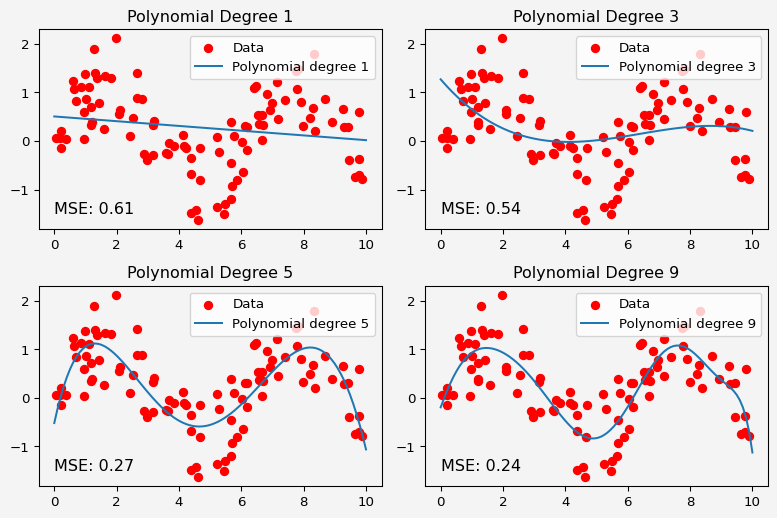

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1) * 10
y = np.sin(X).ravel() + np.random.randn(n_samples) * 0.5

# Function to plot the results
def plot_bias_variance(X, y, degrees):
    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    fig, axs = plt.subplots(2,2, figsize=(8.2,5.5))
    fig.patch.set_facecolor('#f4f4f4')

    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X)
        X_plot_poly = poly.transform(X_plot)
        
        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_poly, y)
        
        # Predict on the plot points
        y_plot_pred = model.predict(X_plot_poly)
        
        ax = axs[i//2, i%2]
        ax.set_facecolor('#f4f4f4')
        ax.scatter(X,y, color='red', label='Data')
        ax.plot(X_plot, y_plot_pred, label=f'Polynomial degree {degree}')
        ax.set_title(f'Polynomial Degree {degree}')
        ax.legend()
        
        # Calculate and display training error
        y_pred = model.predict(X_poly)
        mse = mean_squared_error(y, y_pred)
        ax.text(0, -1.5, f'MSE: {mse:.2f}', fontsize=12)

    plt.tight_layout()
    plt.savefig('bv.png')
    plt.show()

# Visualize bias-variance tradeoff
degrees = [1, 3, 5, 9]
plot_bias_variance(X, y, degrees)

We create a synthetic dataset where $y = \sin(x)$ with added Gaussian
noise.

-   For **low-degree polynomials** (e.g., degree 1), the model has high
    bias. It is too simple to capture the nonlinear relationship in the
    data, leading to underfitting.
-   For **high-degree polynomials** (e.g., degree 9), the model has high
    variance. It fits the training data too closely, even capturing the
    noise, leading to overfitting.
-   A **moderate-degree polynomial** (e.g., degree 3 or 5) balances bias
    and variance, achieving the lowest error on unseen data.

The bias-variance tradeoff is a crucial concept for building machine
learning models that generalize well. By understanding how bias and
variance contribute to the total error, we can make informed decisions
about model complexity. In practice, techniques like cross-validation
and regularization are often used to find the optimal balance between
bias and variance. <br> <br> Understanding and visualizing this tradeoff
helps machine learning practitioners fine-tune their models to achieve
the best possible performance.

## References

1.  **Hastie, T., Tibshirani, R., & Friedman, J.** (2009). *The Elements
    of Statistical Learning: Data Mining, Inference, and Prediction*.
    Springer.
2.  **Bishop, C. M.** (2006). *Pattern Recognition and Machine
    Learning*. Springer.
3.  **Géron, A.** (2019). *Hands-On Machine Learning with Scikit-Learn,
    Keras, and TensorFlow*. O’Reilly Media.
4.  **Kohavi, R. & Wolpert, D.** (1996). Bias plus variance
    decomposition for zero-one loss functions. *Proceedings of the 13th
    International Conference on Machine Learning*.
5.  **James, G., Witten, D., Hastie, T., & Tibshirani, R.** (2013). *An
    Introduction to Statistical Learning with Applications in R*.
    Springer.

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/biasvariance/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/biasvariance/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/biasvariance/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**